In [36]:
from plotnine import *
from plotnine import ggplot

In [37]:
import pandas as pd
weather=pd.read_csv('london2018.csv')
weather

,Year,Month,Tmax,Tmin,Rain,Sun
0,2018,1,9.7,3.8,58.0,46.5
1,2018,2,6.7,0.6,29.0,92.0
2,2018,3,9.8,3.0,81.2,70.3
3,2018,4,15.5,7.9,65.2,113.4
4,2018,5,20.8,9.8,58.4,248.3
5,2018,6,24.2,13.1,0.4,234.5
6,2018,7,28.3,16.4,14.8,272.5
7,2018,8,24.5,14.5,48.2,182.1
8,2018,9,20.9,11.0,29.4,195.0
9,2018,10,16.5,8.5,61.0,137.0


### Line graph

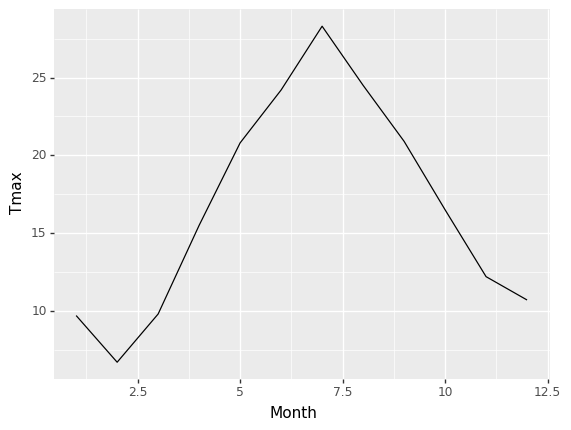

<ggplot: (-9223371875485841376)>

In [38]:
(ggplot(weather,aes('Month', 'Tmax'))
  + geom_line()
)

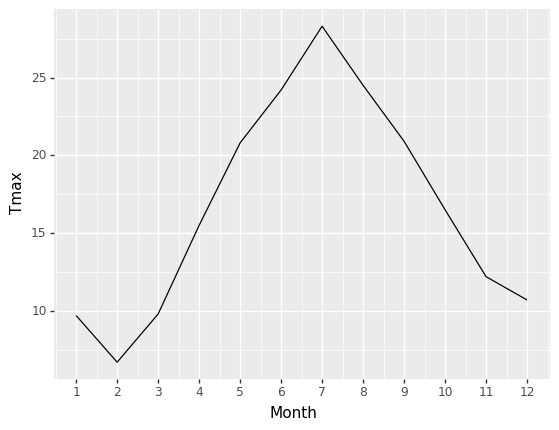

<ggplot: (-9223371875477765336)>

In [39]:
months=weather['Month']
(ggplot(weather,aes('Month','Tmax')) 
  + geom_line()
  + scale_x_continuous(breaks=months)
)

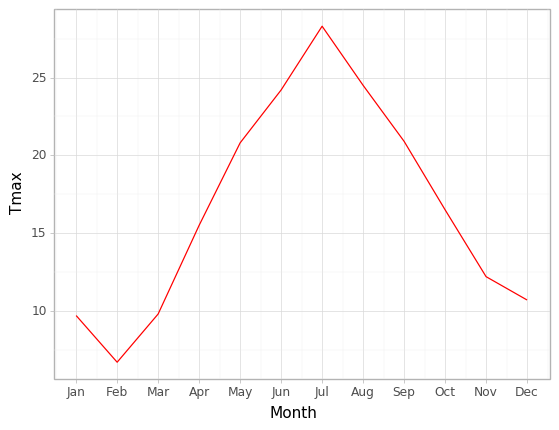

<ggplot: (-9223371875477973164)>

In [40]:
month_labels=("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")
(ggplot(weather,aes('Month','Tmax')) 
  + geom_line(color='red') 
  + scale_x_continuous(breaks=months,labels=month_labels) 
  + theme_light()
)

### Column chart

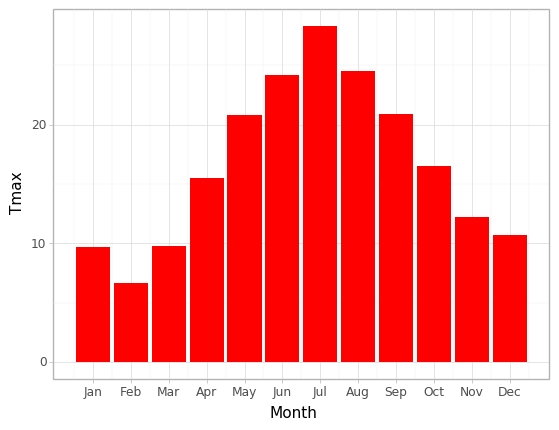

<ggplot: (-9223371875477931860)>

In [41]:
(ggplot(weather,aes('Month','Tmax'))
  + geom_col(fill='red')
  + scale_x_continuous(breaks=months, labels=month_labels)
  + theme_light()
)

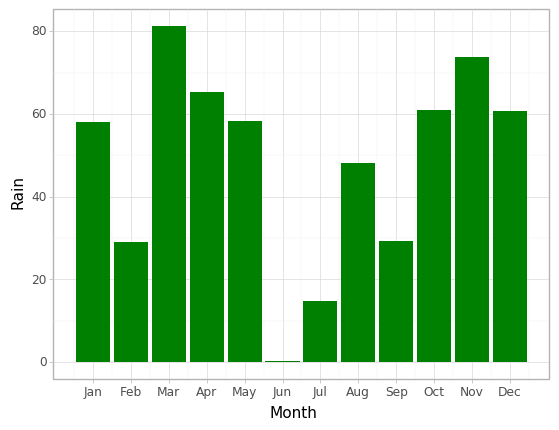

<ggplot: (-9223371875477920780)>

In [42]:
(ggplot(weather,aes('Month','Rain'))
  + geom_col(fill='green')
  + scale_x_continuous(breaks=months, labels=month_labels)
  + theme_light()
)

### Multiple graphs

In [43]:
temps = pd.melt(weather, id_vars=['Month'], value_vars=['Tmax','Tmin'],
var_name='Temp', value_name='DegC' )
temps

,Month,Temp,DegC
0,1,Tmax,9.7
1,2,Tmax,6.7
2,3,Tmax,9.8
3,4,Tmax,15.5
4,5,Tmax,20.8
5,6,Tmax,24.2
6,7,Tmax,28.3
7,8,Tmax,24.5
8,9,Tmax,20.9
9,10,Tmax,16.5


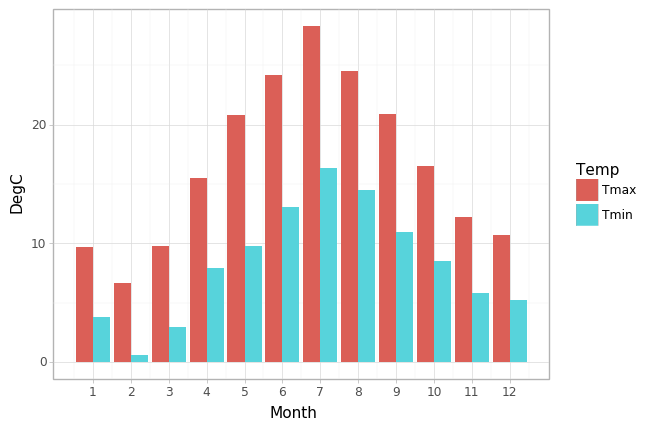

<ggplot: (-9223371875478570584)>

In [44]:
(ggplot(temps,aes('Month','DegC',fill='Temp'))
  + geom_col(position='dodge')
  + scale_x_continuous(breaks=months)
  + theme_light()
)

### More layers — labels


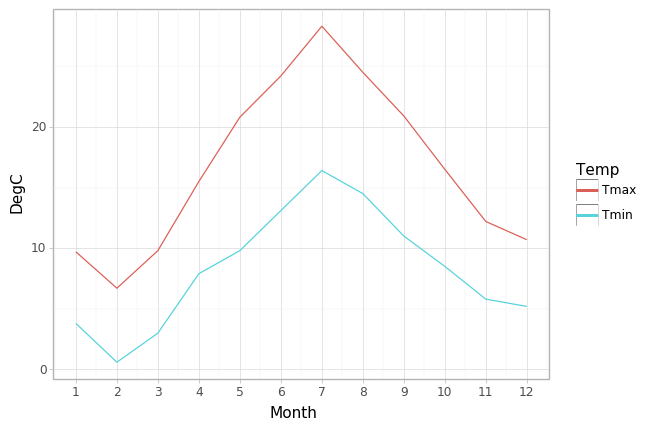

<ggplot: (-9223371875478479948)>

In [49]:
(ggplot(temps,aes('Month','DegC',color='Temp'))
  + geom_line()
  + scale_x_continuous(breaks=months)
  + theme_light()
)

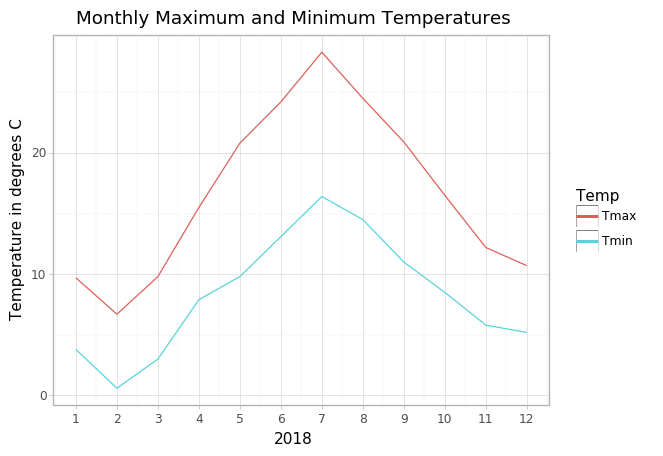

<ggplot: (-9223371875478423880)>

In [50]:
(ggplot(temps,aes('Month','DegC',color='Temp'))
  + geom_line()
  + scale_x_continuous(breaks=months)
  + theme_light()
  + xlab('2018')
  + ylab('Temperature in degrees C')
  + ggtitle('Monthly Maximum and Minimum Temperatures')
)

### More layers — Facets

In [47]:
data = pd.melt(weather, id_vars=['Month'],
               value_vars=['Tmax','Tmin','Rain','Sun'],
               var_name='Measure', value_name='Value' )

C:\Users\umair\anaconda3\lib\site-packages\plotnine\facets\facet.py:552: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
C:\Users\umair\anaconda3\lib\site-packages\plotnine\facets\facet.py:558: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


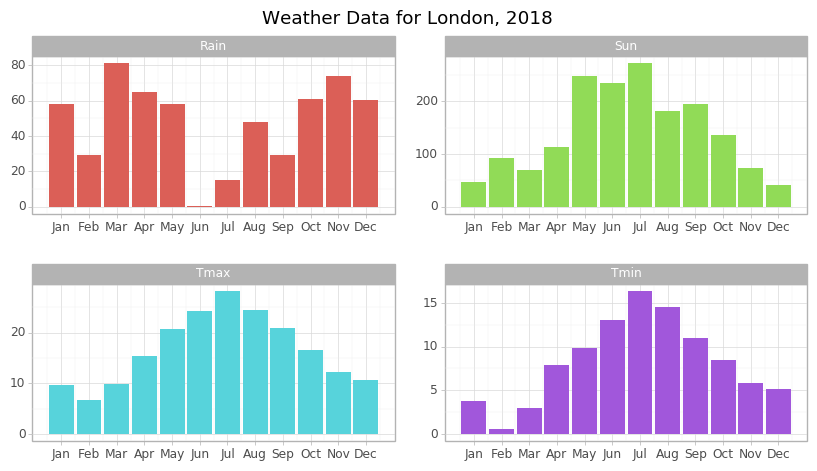

<ggplot: (-9223371875477905908)>

In [48]:
(ggplot(data, aes('Month','Value', fill='Measure'))
  + geom_col(show_legend=False)
  + scale_x_continuous(breaks=months,labels=month_labels)
  + facet_wrap('Measure', scales='free')
  + xlab('')
  + ylab('')
  + ggtitle('Weather Data for London, 2018')
  + theme_light()
  + theme(panel_spacing=0.5, figure_size=(10,5))
)